# Aadhar Captcha

In [2]:
import time
from selenium import webdriver

In [18]:
img_num = 2

In [21]:
uid = '624342054829'

url = 'https://resident.uidai.gov.in/offline-kyc'

## OCR on CAPTCHA

In [34]:
import pytesseract
import cv2
import matplotlib.pyplot as plt


Display image

In [46]:
def disp_img(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [57]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    disp_img(img)
    return img

In [58]:
def OCR(img):
    img = preprocess(img)
    
    data = pytesseract.image_to_string(img)
#     data = ''
    return data

result: ocS\g



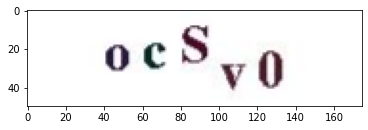

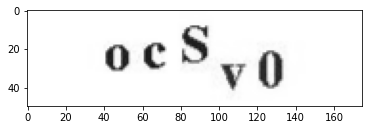

In [59]:
img = cv2.imread('dataset/captcha_0.png') # BGR format
disp_img(img)

print('result:', OCR(img))

## Webscrap CAPTCHA and automate login

In [27]:
driver = webdriver.Chrome()
driver.get(url)

time.sleep(3)

captcha_img = driver.find_element_by_id('captcha-img')
captcha_img.screenshot(f'dataset/captcha_{img_num}.png')
img_num += 1

user_id = driver.find_element_by_id('uid1')
user_id.send_keys(uid)

security_code = driver.find_element_by_id('security_code')
code = get_code(captcha_img)
security_code.send_keys(code)

time.sleep(3)
driver.close()